In [ ]:
# Basic data analysis of Tips datasets using the numpy and pandas liabraries. Tips datasets is downloaded from Kaggle sources.
# Tips datasets contain the data regarding the bill and tips amount spend by People who dine at a certain restaurant.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
tips_data=pd.read_csv('tips.csv') # Since the data is in csv file.

In [3]:
# Top 5 row data
tips_data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
# Bottom 5 row data
tips_data.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [5]:
# Column names
list(tips_data.columns)

['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size']

In [6]:
# Total data 
len(tips_data)

244

In [7]:
# Number of unique datas in each columns
tips_data.nunique()

total_bill    229
tip           123
sex             2
smoker          2
day             4
time            2
size            6
dtype: int64

In [8]:
# Eg. Unique Days 
tips_data['day'].unique()

array(['Sun', 'Sat', 'Thur', 'Fri'], dtype=object)

In [9]:
# Eg. Unique Time
tips_data['time'].unique()

array(['Dinner', 'Lunch'], dtype=object)

In [10]:
# Statistical Summary
tips_data.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


In [11]:
# Data types of each columns
# tips_data.dtypes   OR
tips_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [12]:
# Checking Missing values in any columns
# tips_data.isnull()
# tips_data.isna()
tips_data.isna().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [13]:
# Total Bill Amount 
# np.sum(tips_data['total_bill'].values) OR
# tips_data.loc[:,'total_bill'].sum()    OR
tips_data['total_bill'].sum()

4827.77

In [14]:
# Total Tip Amount
tips_data['tip'].sum()

731.5799999999999

In [15]:
# Average Bill Amount 
# np.mean(tips_data['total_bill'])
tips_data['total_bill'].mean()

19.785942622950824

In [16]:
# Average Tip Amount
tips_data['tip'].mean()

2.9982786885245902

In [17]:
# Maximum Bill Amount
tips_data['total_bill'].max()

50.81

In [18]:
# Minimum Bill Amount
tips_data['total_bill'].min()

3.07

In [19]:
# Maximum Tip Amount
tips_data['tip'].max()

10.0

In [20]:
tips_data['total_bill'].skew()

1.1332130376158205

In [21]:
tips_data['total_bill'].kurt()

1.2184840156638854

In [22]:
# Maximum Group Size
tips_data['size'].max()

6

In [23]:
# Total Male and Female Customers
# tips_data['sex'].value_counts()   OR
tips_data.groupby('sex').size()

sex
Female     87
Male      157
dtype: int64

In [24]:
# (tips_data['sex']=='Male').sum()  OR
tips_data['sex'].isin(['Male']).sum() 

157

In [25]:
# (tips_data['sex']=='Female').sum()  OR
tips_data['sex'].isin(['Female']).sum()

87

In [26]:
# Total Bill Amount, Tip and Size by Time
tips_data.groupby('time').sum()

,total_bill,tip,size
time,,,
Dinner,3660.30,546.07,463
Lunch,1167.47,185.51,164


In [27]:
# Row with Maximum Bill Amount
tips_data[tips_data['total_bill']==tips_data['total_bill'].max()]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


In [28]:
# Row with Maximum Tip Amount
tips_data[tips_data['tip']==tips_data['tip'].max()]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


In [29]:
# Maximum Tip by Male and Female
tips_data.groupby('sex')['tip'].max()

sex
Female     6.5
Male      10.0
Name: tip, dtype: float64

In [30]:
# OR
tips_data.groupby('sex').max()

,total_bill,tip,smoker,day,time,size
sex,,,,,,
Female,44.30,6.5,Yes,Thur,Lunch,6
Male,50.81,10.0,Yes,Thur,Lunch,6


In [31]:
male=tips_data[tips_data['sex']=='Male']

In [32]:
male[male['tip']==male['tip'].max()]

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.0,Male,Yes,Sat,Dinner,3


In [33]:
female=tips_data[tips_data['sex']=='Female']

In [34]:
female[female['tip']==female['tip'].max()]

,total_bill,tip,sex,smoker,day,time,size
214,28.17,6.5,Female,Yes,Sat,Dinner,3


In [35]:
# Total bill, tip and size of Smoker and None Smoker
tips_data.groupby('smoker').sum()

,total_bill,tip,size
smoker,,,
No,2897.43,451.77,403
Yes,1930.34,279.81,224


In [36]:
# Number of Male and Female Smoker and None Smoker 
df=pd.DataFrame(tips_data.groupby('sex')['smoker'].value_counts())
df

smoker
sex    smoker        
Female No          54
       Yes         33
Male   No          97
       Yes         60

In [37]:
# Total Number of Smoker and None Smoker
tips_data['smoker'].value_counts()

No     151
Yes     93
Name: smoker, dtype: int64

In [38]:
total_no=tips_data['smoker'].count()
total_no

244

In [39]:
# Percentage of Smokers (out of total Peoples)
(df.loc['Male','Yes'].sum()+df.loc['Female','Yes'].sum())/(total_no)*100

38.114754098360656

In [40]:
# Percentage of None Smokers (out of total Peoples)
(df.loc['Male','No'].sum()+df.loc['Female','No'].sum())/(total_no)*100

61.885245901639344

In [41]:
# Percentage of Male who Smokes (out of total smokers)
(df.loc['Male','Yes'].sum()/(df.loc['Male','Yes'].sum()+df.loc['Female','Yes'].sum()))*100

64.51612903225806

In [42]:
# Percentage of Female who Smokes (out of total smokers)
(df.loc['Female','Yes'].sum()/(df.loc['Female','Yes'].sum()+df.loc['Male','Yes'].sum()))*100

35.483870967741936

In [43]:
# Percentage of Male who smokes (out of total Peoples)
# (df.loc['Male','Yes'].sum()/(df.loc['Male','Yes'].sum()+df.loc['Male','No'].sum()+df.loc['Female','Yes'].sum()+df.loc['Female','No'].sum()))*100    OR
(df.loc['Male','Yes'].sum()/total_no)*100

24.59016393442623

In [44]:
# Percentage of Female who smokes (out of total Peoples)
(df.loc['Female','Yes'].sum()/total_no)*100

13.524590163934427

In [45]:
# Percentage of Male who Smokes (out of total Males)
df.loc['Male','Yes'].sum()/df.loc['Male'].sum()*100

smoker    38.216561
dtype: float64

In [46]:
# Percentage of female who Smokes (out of total Females)
df.loc['Female','Yes'].sum()/df.loc['Female'].sum()*100

smoker    37.931034
dtype: float64

<AxesSubplot:xlabel='sex', ylabel='count'>

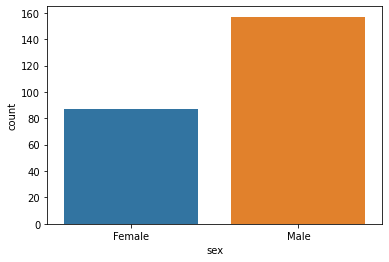

In [105]:
# No. of Male and Female 
sns.countplot(x='sex',data=tips_data)

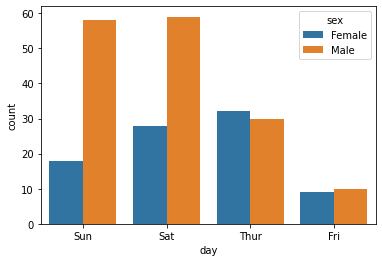

In [107]:
# No. of Male and Female in each days of week
ax=sns.countplot(x='day',data=tips_data,hue='sex')

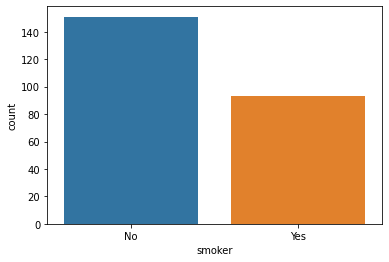

In [52]:
# No. of Smoker and None Smoker
ax=sns.countplot(x='smoker',data=tips_data)

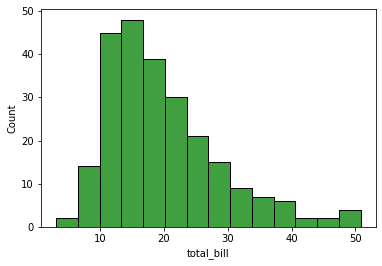

In [55]:
# Bill amounts on histogram. Shows bill amount inclined to $ 10-20 bin. 
ax=sns.histplot(x='total_bill',data=tips_data,color='green')

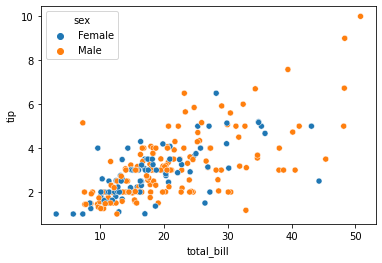

In [109]:
# Total bill and tip amount by Male and Female
ax=sns.scatterplot(x='total_bill',y='tip',data=tips_data,hue='sex')

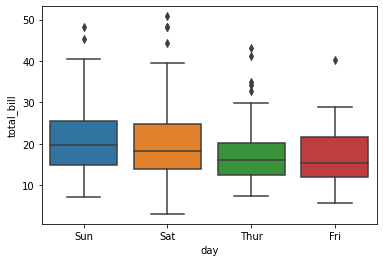

In [108]:
# Boxplot dipicting the minimum and maximum bill amount along with Quartiles (1,2 and 3) on particular days.  
ax=sns.boxplot(x='day',y='total_bill',data=tips_data)

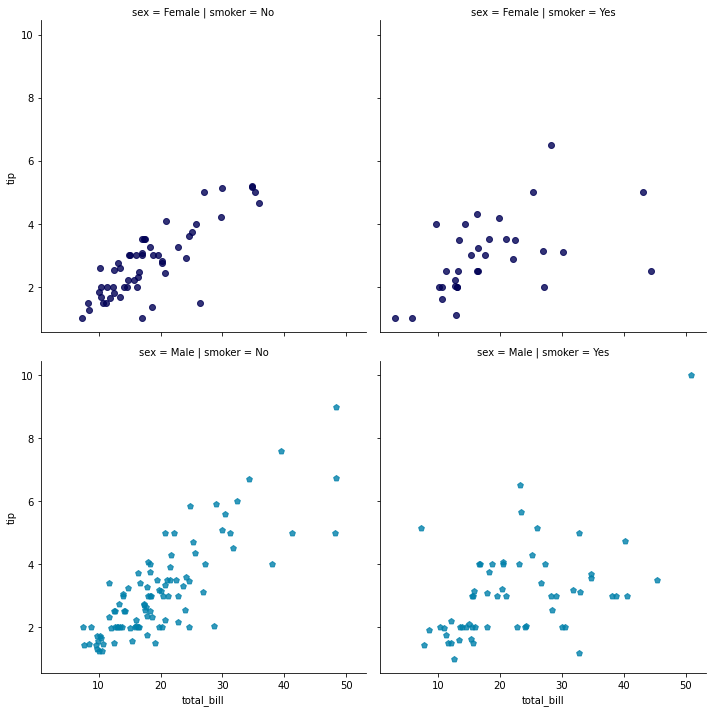

In [117]:
# Total bill and tip amount paid by Smoking and None Smoking Male and Female
ax=sns.lmplot(x='total_bill',y='tip',data=tips_data,hue='sex',fit_reg=False,markers=['o','p'],palette='ocean',row='sex',col='smoker')